In [267]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2 as cv

np.random.seed = 42

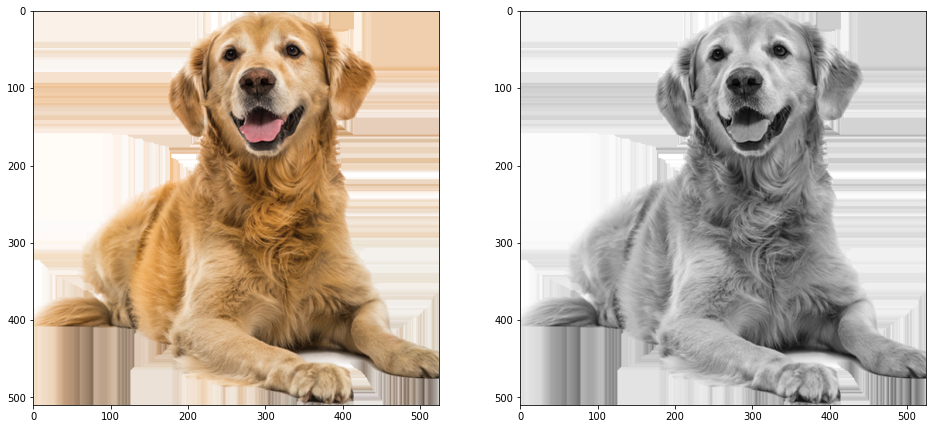

In [278]:
img = cv.imread("Images/dog.png", -1)

grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax2.imshow(cv.cvtColor(grayscale, cv.COLOR_BGR2RGB))

In [251]:
G = 1  # Gravitational constant
c = 1  # Speed of light

[[-0.69967942 -0.36128372]
 [-0.30026982  0.53156299]
 [-0.23488347  0.17420017]
 [-0.26899617  0.13873883]
 [-0.30706252  0.9488279 ]
 [-0.53555251  0.89601114]
 [-0.43394838  0.81883964]
 [ 0.76413896  0.53217963]
 [ 0.01969164  0.37477935]
 [-0.00497024 -0.84384658]]
[-0.20015319  0.32100093]


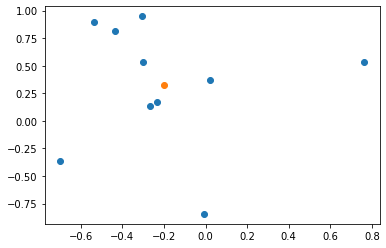

In [252]:
# Randomly distribute microlenses
N = 10
x = np.random.uniform(low=-1, high=1, size=N)
y = np.random.uniform(low=-1, high=1, size=N)

XI_i = np.stack((x, y), axis=1)  # Lens positions
M_i = np.array([np.ones(N)])  # Lens Masses

print(XI_i)
CoM = np.average(XI_i, axis=0, weights=M_i[0])

# ndimage.center_of_mass(X)  # Determine the center of mass of the distribution.
print(CoM)

plt.scatter(x, y)
plt.scatter(*CoM)

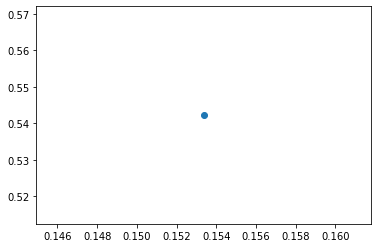

In [285]:
# Distribute source(s)
N = 1
x = np.random.uniform(low=-1, high=1, size=N)
y = np.random.uniform(low=-1, high=1, size=N)

Y_i = np.stack((x, y), axis=1)  # Lens positions
M_i = np.array([np.ones(N)])  # Lens Masses

plt.scatter(x, y)

In [253]:
x = np.array([[-0.2, 0.6]])
print(x.shape)
diff = x - XI_i

M_i = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]])
print(M_i.shape)
stuff = M_i.T * (x - XI_i) / np.linalg.norm(x - XI_i)
print(stuff)
print(np.sum(stuff, axis=0))
a = np.arange(12).reshape(4, 3)
print(a.sum(axis=0))
print(np.sum(a, axis=0))
np.sum(stuff)

(1, 2)
(1, 10)
[[ 0.21953818  0.42234775]
 [ 0.08810871  0.06013671]
 [ 0.045979    0.56123576]
 [ 0.12125609  0.81063525]
 [ 0.23519391 -0.76630175]
 [ 0.88456621 -0.78032928]
 [ 0.71950974 -0.67304273]
 [-3.3888178   0.23837942]
 [-0.86870965  0.89057258]
 [-0.          0.        ]]
[-1.94337561  0.76363372]
[18 22 26]
[18 22 26]


-1.179741887523971

In [282]:
def deflection_vector_point_masses(XI_1, XI_2, XI_i, M_i):
    """
    Calculates the deflection vector for light at position XI on the image plane,
    due to point masses M_i scattered at locations XI_i on the image plane.
    :param XI_1: first component of position vector of the light on image plane.
    :param XI_2: second component of position vector of the light on image plane.
    :param XI_i: (N, 2) np.array: positions of point masses on image plane.
    :param M_i: (1, N) np.array: the masses of the point masses.
    :return: (1, 2) np.array: the position vector of deflection angle.
    """
    XI = np.array([[XI_1, XI_2]])
    deflection_vector = 4 * G / c ** 2 * np.sum(M_i.T * (XI - XI_i) / np.linalg.norm(XI - XI_i), axis=0)

    return deflection_vector


deflection_vector_point_masses(-0.2, 0.6, XI_i, M_i)

array([-7.77350244,  3.05453489])

In [284]:
# Calculate the deflection vector along horizontal axis
xs = np.linspace(-1, 1, 100)
ys = np.zeros(100)

def_vecs = []
for x, y in zip(xs, ys):
    def_vecs.append(deflection_vector_point_masses(x, y, XI_i, M_i))

def_vecs

[array([-47.01098179, -29.37886669]),
 array([-46.58631735, -29.78328451]),
 array([-46.14196851, -30.19386833]),
 array([-45.67700981, -30.61044407]),
 array([-45.19048535, -31.03279953]),
 array([-44.68141038, -31.46068069]),
 array([-44.14877359, -31.89378792]),
 array([-43.59153986, -32.33177193]),
 array([-43.00865384, -32.77422973]),
 array([-42.39904427, -33.22070039]),
 array([-41.76162916, -33.67066084]),
 array([-41.09532198, -34.12352172]),
 array([-40.39903884, -34.57862331]),
 array([-39.67170681, -35.03523172]),
 array([-38.91227345, -35.49253537]),
 array([-38.1197175 , -35.94964193]),
 array([-37.29306093, -36.40557586]),
 array([-36.43138218, -36.85927672]),
 array([-35.53383069, -37.30959829]),
 array([-34.59964263, -37.75530899]),
 array([-33.62815761, -38.19509334]),
 array([-32.61883637, -38.62755507]),
 array([-31.57127908, -39.05122179]),
 array([-30.48524409, -39.4645515 ]),
 array([-29.36066664, -39.86594096]),
 array([-28.19767719, -40.25373621]),
 array([-26.

In [264]:
def deflection_vector_point_masses(XI_1, XI_2, XI_i, M_i):
    """
    Calculates the deflection vector for light at position XI on the image plane,
    due to point masses M_i scattered at locations XI_i on the image plane.
    :param XI_1: first component of position vector of the light on image plane.
    :param XI_2: second component of position vector of the light on image plane.
    :param XI_i: (N, 2) np.array: positions of point masses on image plane.
    :param M_i: (1, N) np.array: the masses of the point masses.
    :return: (1, 2) np.array: the position vector of deflection angle.
    """
    XI = np.array([XI_1, XI_2])

    #print(XI)
    deltaXI = XI - XI_i.T

    deflection_vector = 4 * G / c ** 2 * np.sum(M_i.T * (XI - XI_i) / np.linalg.norm(XI - XI_i), axis=0)

    return deflection_vector


x, y = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
deflection_vector_point_masses(X, Y, XI_i, M_i)

ValueError: operands could not be broadcast together with shapes (2,100,100) (2,10) 

In [222]:
x, y = 2, 5
X = np.array([[x, y]])



array([ 4.63584648, 13.02039825])

In [230]:
# Calculate the deflection vector for all points on the image plane.

x, y = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)


def deflection(x, y, XI_i, M_i):
    X = np.array([[x, y]])
    alpha = np.array([[0, 0]])
    for i in range(len(XI_i)):
        xi, m = XI_i[i], M_i[i]
        X += m * (X - xi) / np.linalg.norm(X - xi)
    return 4 * G / c ** 2 * alpha


deflection_angles = deflection(X, Y, XI_i, M_i)
plt.imshow(deflection_angles)

ValueError: operands could not be broadcast together with shapes (1,2,100,100) (2,) 

ValueError: operands could not be broadcast together with shapes (10,2) (1,2,3,5) 

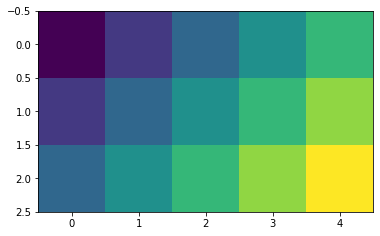

In [227]:
x, y = np.arange(5), np.arange(3)
X, Y = np.meshgrid(x, y)


def func(x, y):
    return x + y


#plt.imshow(func(X, Y))


def test(X, Y, XI_i):
    XI = np.array([[X, Y]])
    return XI_i - XI


test(X, Y, XI_i)
#np.dstack((X, Y))

In [ ]:
def center_of_mass(X, M):


In [97]:
x = np.array((0, 2))
y = np.array((1, 3))
XI_i = np.stack((x, y), axis=1)
M_i = np.array((1, 2))

In [98]:
print(XI_i)
print(M_i)
print(np.average(XI_i, axis=0, weights=M_i))

[[0 1]
 [2 3]]
[1 2]
[1.33333333 2.33333333]


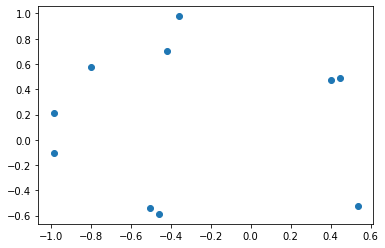

In [237]:
# Randomly distribute microlenses
N = 10
xi = np.random.uniform(low=-1, high=1, size=N)
yi = np.random.uniform(low=-1, high=1, size=N)

M_i = np.ones(N)  # Lens Masses

plt.scatter(xi, yi)
plt.show()

In [248]:
x, y = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)


@np.vectorize
def deflection(x, y):
    xf, yf = 0, 0
    for i in range(N):
        dx, dy = 0, 0
        dx += -xi + x
        dy += -yi + y

        norm2 = dx ** 2 + dy ** 2
        dx /= norm2
        dy /= norm2

        xf += dx
        yf += dy
    return xf, yf


deflection(X, Y)

ValueError: setting an array element with a sequence.

In [ ]:
x, y = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
